<a href="https://colab.research.google.com/github/TamTran72111/WEB222-CSS-Assignment/blob/master/Shopify_Challenge/Data_Science_Intern_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [1]:
# Upload data file to colab
from google.colab import files
uploaded = files.upload()

Saving shopify_data.csv to shopify_data (1).csv


In [2]:
# Load data file using pandas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


csv_file = 'shopify_data.csv'
data = pd.read_csv(csv_file)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
type(data['created_at'][0])

str

In [6]:
# convert `created_at` from string to date as the name `created_at_date`
data['created_at_date'] = pd.to_datetime(data['created_at']).map(lambda d: d.date())

In [7]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_at_date
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03
2,3,44,861,144,1,cash,2017-03-14 4:23:56,2017-03-14
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,2017-03-01


Text(0, 0.5, 'order_amount')

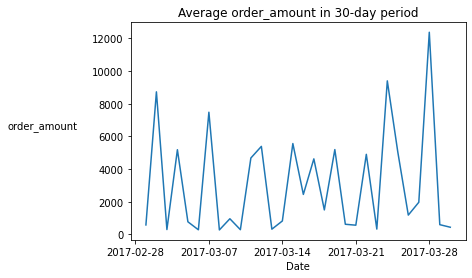

In [9]:
# Plot the data in time through 30-day period
data.groupby('created_at_date').mean()['order_amount'].plot()
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.title('Average order_amount in 30-day period')
plt.xlabel('Date')
plt.ylabel('order_amount', rotation=0, labelpad=50)

In [8]:
# Describe data to see the statistic of its columns
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The mean of `order_amount` is \$3145.128, which matchs the average order value (*AOV*) mentioned. However, the max value of `order_amount` is \$704,000, and the max value of `total_items` is 2000, which mean there are some kind of wholesale orders. Therefore, we should calculate price of each item to get to see what made the *AOV* high. As the question mentioned, each shop sells only one model of shoe, so we can get the price of the model in each shop by dividing the `order_amount` by `total_items`.

In [10]:
data['item_price'] = data['order_amount'] / data['total_items']

In [11]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items,item_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


As the statistic above, we can see that the min `item_price` is \$90 and its third quantile is \$169, which are affordable. However, its max is \$25,725, which is expensive.


Let's group the data by `shop_id` then plot the mean of `item_price`, `total_items` and `order_amount` to see the distribution of sneaker models in 100 shops


In [12]:
data_group_by_shop = data.groupby('shop_id')

Text(0, 0.5, 'item_price')

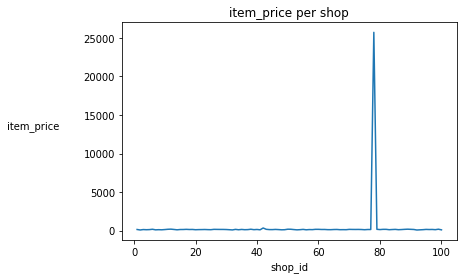

In [13]:
# Plot the mean of `item_price` per shop
data_group_by_shop.mean()['item_price'].plot()
plt.title('item_price per shop')
plt.ylabel('item_price', rotation=0, labelpad=50)

Text(0, 0.5, 'total_items')

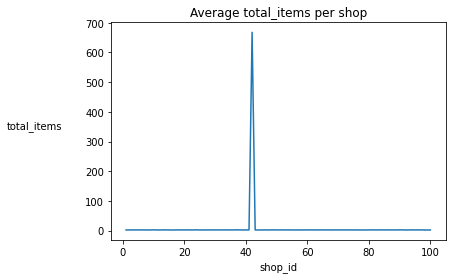

In [14]:
# Plot the mean of `total_items` per shop
data_group_by_shop.mean()['total_items'].plot()
plt.title('Average total_items per shop')
plt.ylabel('total_items', rotation=0, labelpad=50)

Text(0, 0.5, 'order_amount')

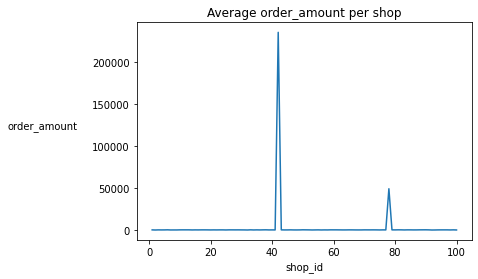

In [15]:
# Plot the mean of `order_amount` per shop
data_group_by_shop.mean()['order_amount'].plot()
plt.title('Average order_amount per shop')
plt.ylabel('order_amount', rotation=0, labelpad=50)

From the graphs above, we can see that there is one shop, which sells an expensive sneaker model with the price about \$25,000, and another shop often sells sneakers in bulk.

In [16]:
# Check the orders of the luxury sneakers
data[data['item_price'] > 25000].describe()

,order_id,shop_id,user_id,order_amount,total_items,item_price
count,46.000000,46.0,46.000000,46.000000,46.000000,46.0
mean,2663.021739,78.0,867.739130,49213.043478,1.913043,25725.0
std,1338.520020,0.0,81.314871,26472.227449,1.029047,0.0
min,161.000000,78.0,707.000000,25725.000000,1.000000,25725.0
25%,1428.250000,78.0,812.500000,25725.000000,1.000000,25725.0
50%,2796.500000,78.0,866.500000,51450.000000,2.000000,25725.0
75%,3720.250000,78.0,935.750000,51450.000000,2.000000,25725.0
max,4919.000000,78.0,997.000000,154350.000000,6.000000,25725.0


In [17]:
# Check the wholesale orders
data[data['total_items'] > 10].describe()

,order_id,shop_id,user_id,order_amount,total_items,item_price
count,17.000000,17.0,17.0,17.0,17.0,17.0
mean,2336.235294,42.0,607.0,704000.0,2000.0,352.0
std,1603.584872,0.0,0.0,0.0,0.0,0.0
min,16.000000,42.0,607.0,704000.0,2000.0,352.0
25%,1363.000000,42.0,607.0,704000.0,2000.0,352.0
50%,2154.000000,42.0,607.0,704000.0,2000.0,352.0
75%,3333.000000,42.0,607.0,704000.0,2000.0,352.0
max,4883.000000,42.0,607.0,704000.0,2000.0,352.0


From the data above, we can see that the shop with `shop_id` 42 often sells wholesale orders, and the shop with `shop_id` 78 sell a luxury brand sneaker, which costs \$25,725

Now, let's remove these 2 outliers from the data.

In [18]:
data_without_outliers = data[data['shop_id'] != 42]
data_without_outliers = data_without_outliers[data_without_outliers['shop_id'] != 78]
data_without_outliers.describe()

,order_id,shop_id,user_id,order_amount,total_items,item_price
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717,150.400163
std,1444.221163,29.154367,86.887947,155.941112,0.982602,23.851202
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


From the statistic, we can see that the item price vaires from \$90 to \$201, and the mean of `order_amount`(AOV) is about \$300, which is much more resonable, since those sneakers are affordable items.


Text(0, 0.5, 'order_amount')

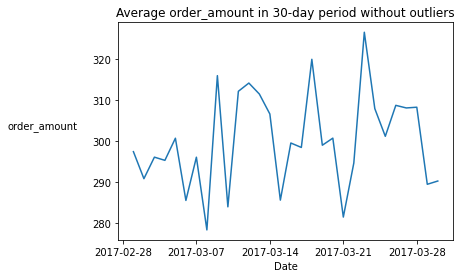

In [19]:
# Plot the data in time through 30-day period after remove outliers
data_without_outliers.groupby('created_at_date').mean()['order_amount'].plot()
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.title('Average order_amount in 30-day period without outliers')
plt.xlabel('Date')
plt.ylabel('order_amount', rotation=0, labelpad=50)

Text(0, 0.5, 'order_amount')

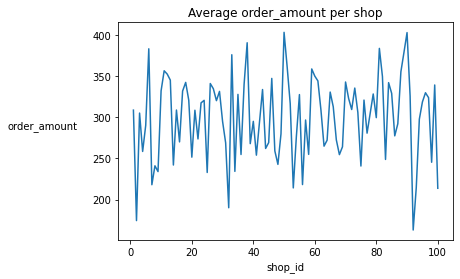

In [20]:
data_without_outliers.groupby('shop_id').mean()['order_amount'].plot()
plt.title('Average order_amount per shop')
plt.ylabel('order_amount', rotation=0, labelpad=50)

Text(0.5, 0, 'order_amount')

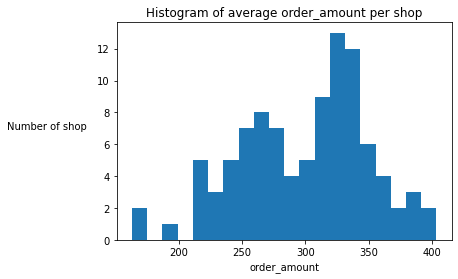

In [21]:
data_without_outliers.groupby('shop_id').mean()['order_amount'].plot.hist(bins=20)
plt.title('Histogram of average order_amount per shop')
plt.ylabel('Number of shop', rotation=0, labelpad=50)
plt.xlabel('order_amount')

Text(0, 0.5, 'total_items')

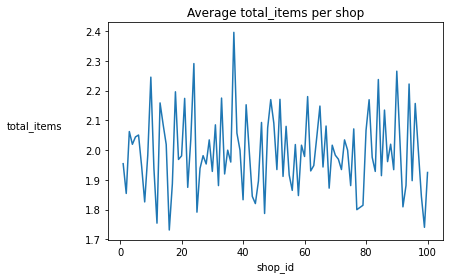

In [22]:
data_without_outliers.groupby('shop_id').mean()['total_items'].plot()
plt.title('Average total_items per shop')
plt.ylabel('total_items', rotation=0, labelpad=50)

Text(0.5, 0, 'total_items')

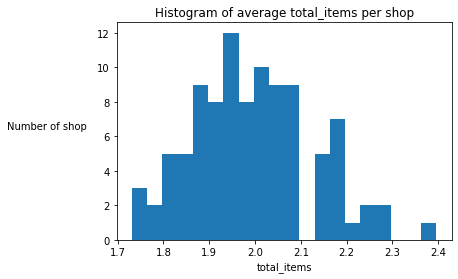

In [23]:
data_without_outliers.groupby('shop_id').mean()['total_items'].plot.hist(bins=20)
plt.title('Histogram of average total_items per shop')
plt.ylabel('Number of shop', rotation=0, labelpad=50)
plt.xlabel('total_items')

In [24]:
# Statistic by `shop_id` for the whole 30-day peroid
data_without_outliers.groupby('shop_id').sum().describe()

,order_id,user_id,order_amount,total_items,item_price
count,98.000000,98.000000,98.000000,98.000000,98.000000
mean,125055.744898,42518.959184,15016.979592,99.846939,7524.612245
std,20753.028938,6217.758609,3469.426421,16.365259,1677.687250
min,79683.000000,29323.000000,6840.000000,67.000000,3780.000000
25%,110727.250000,37116.500000,12803.500000,88.000000,6502.500000
50%,124559.000000,42853.000000,14763.000000,100.000000,7397.000000
75%,139496.000000,47423.250000,17478.000000,111.000000,8559.250000
max,173312.000000,58381.000000,23128.000000,136.000000,11956.000000


Text(0.5, 0, 'order_amount')

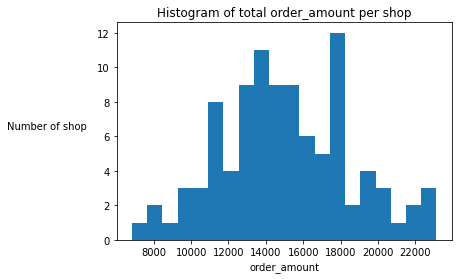

In [25]:
data_without_outliers.groupby('shop_id').sum()['order_amount'].plot.hist(bins=20)
plt.title('Histogram of total order_amount per shop')
plt.ylabel('Number of shop', rotation=0, labelpad=50)
plt.xlabel('order_amount')

Text(0.5, 0, 'total_items')

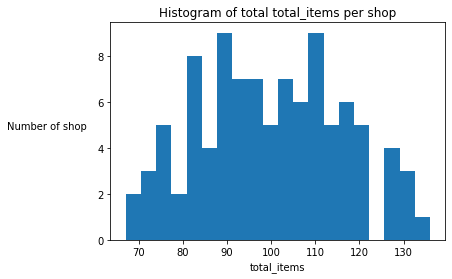

In [26]:
data_without_outliers.groupby('shop_id').sum()['total_items'].plot.hist(bins=20)
plt.title('Histogram of total total_items per shop')
plt.ylabel('Number of shop', rotation=0, labelpad=50)
plt.xlabel('total_items')

## **Answer:**

From the graphs and statistic above, we can conclude that the problem with the calculation is it included the wholesale shop and the luxury brand shop. These 2 outliers made the AOV increase by a factor of 10.
Thus, to report this dataset, the data should be clustered in categories based on those 100 shops such as wholesale shops, normal shops and luxury brand shops.

Furthermore, the mean (\$15,016) of monthly revenue (total `order_amount` per shop) of the rest 98 shops are close to its median, and the histogram of the monthly revenue is quite like the bell shape. Therefore, I think average monthly revenue of these shops without outliers can be a good candidate to represent the data.

In conclusion, the data should be clustered based on the shop types(wholesale-retail, normal-luxury), then the monthly revenue can be used as a metric to report the dataset.

# Question 2

## a. How many orders were shipped by Speedy Express in total?

To answer this question, we need to know the shipperId of the **Speedy Express** first. Therefore we need the following query:
```sql
SELECT ShipperID 
  FROM Shippers 
  WHERE ShipperName = 'Speedy Express';
```

Next, we can query orders shipped by **Speedy Express** using the result `ShipperID` found above with sub-query.
```sql
SELECT count() AS "Number of orders" 
  FROM Orders 
  WHERE ShipperID = (
    SELECT ShipperID
      FROM Shippers 
      WHERE ShipperName = 'Speedy Express'
  );
```

**_Answer:_**

 - Query:
```sql
SELECT count() AS "Number of orders"
      FROM Orders 
      WHERE ShipperID = (
          SELECT ShipperID
              FROM Shippers 
              WHERE ShipperName = 'Speedy Express'
  );
```

 - Result: There were **54** orders shipped by Speedy Express.

## b. What is the last name of the employee with the most orders?

Firstly, we need to find the `EmployeeID` of the employee with the most orders from `Orders` table.
```sql
SELECT EmployeeID 
  FROM Orders 
  GROUP BY EmployeeID 
  ORDER BY count() DESC 
  LIMIT 1;
```

Then, using the result `EmployeeID` to find the employee last name.
```sql
SELECT LastName
  FROM Employees
  WHERE EmployeeID = (
    SELECT EmployeeID 
      FROM Orders 
      GROUP BY EmployeeID 
      ORDER BY count() DESC 
      LIMIT 1
  );
```

**_Answer:_**

- Query:
```sql
SELECT LastName
      FROM Employees
      WHERE EmployeeID = (
          SELECT EmployeeID 
              FROM Orders 
              GROUP BY EmployeeID 
              ORDER BY count() DESC 
              LIMIT 1
      );
```

- Result: The last name of the employee with the most orders is **Peacock**.

## c. What product was ordered the most by customers in Germany?

Firstly, we need to find `CustomerID` of customers living in **Germany**.
```sql
SELECT CustomerID 
  FROM Customers 
  WHERE Country = 'Germany';
```

Next, we need to find `OrderID` using those `CustomerID` found above.
```sql
SELECT OrderID
  FROM Orders
  WHERE CustomerID IN (
    SELECT CustomerID 
      FROM Customers 
      WHERE Country = 'Germany'
  );
```

After that, using those `OrderID`, we can find the list of products ordered by customers in **Germany** and then find the `ProductID` of the most ordered one.
```sql
SELECT ProductID 
  FROM OrderDetails 
  WHERE OrderID IN (
    SELECT OrderID 
      FROM Orders 
      WHERE CustomerID IN (
        SELECT CustomerID 
          FROM Customers 
          WHERE Country = 'Germany'
      )
  )
  GROUP BY ProductID 
  ORDER BY count() DESC
  LIMIT 1;
```

Alternatively, we can use `JOIN` to get the same result.
```sql
SELECT ProductID 
  FROM OrderDetails JOIN Orders USING (orderId) 
      JOIN Customers USING (CustomerID) 
  WHERE Country = 'Germany'
  GROUP BY ProductID 
  ORDER BY count() DESC
  LIMIT 1;
```

Finally, we use the result `ProductID` to find the product information
```sql
SELECT *
  FROM Products
  WHERE ProductID = (
    SELECT ProductID 
      FROM OrderDetails JOIN Orders USING (orderId) 
          JOIN Customers USING (CustomerID) 
      WHERE Country = 'Germany'
      GROUP BY ProductID 
      ORDER BY count() DESC
      LIMIT 1
  );
```

**_Answer:_**

- Query:
```sql
SELECT *
      FROM Products
      WHERE ProductID = (
        SELECT ProductID 
            FROM OrderDetails JOIN Orders USING (orderId) 
                JOIN Customers USING (CustomerID) 
            WHERE Country = 'Germany'
            GROUP BY ProductID 
            ORDER BY count() DESC
            LIMIT 1
      );
```

- Result: The product ordered the most by customers in Germany was **Gorgonzola Telino**.